# Homework 1

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

### Data

This homework uses the data file, `treasury_quotes_2024-10-31`.

The problems below analyze the nominal, (rather than the TIPS,) Treasury issues. Accordingly, you should filter out all rows with `type` `TIPS Note` or `TIPS bond`.

***

# 1. Discount Rates

Use the data in the `selected quotes` tab.

Note:
* The selected treasuries are at nearly six-month intervals. 
* If you prefer, approximate that they mature at perfect 6-month intervals. 

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [257]:
quotes_df = pd.read_excel("../data/treasury_quotes_2024-10-31.xlsx", sheet_name="selected quotes")
quotes_df

,KYTREASNO,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm
0,208042,note,2024-10-31,2023-04-30,2025-04-30,0.495551,0,3.875,99.712500,99.722203,99.717351,0,99.717351,0.044933
1,208129,note,2024-10-31,2023-10-31,2025-10-31,0.999316,0,5.000,100.641406,100.660819,100.651113,0,100.651113,0.043311
2,208213,note,2024-10-31,2024-04-30,2026-04-30,1.494867,0,4.875,100.929688,100.960938,100.945312,0,100.945312,0.042327
3,208302,note,2024-10-31,2024-10-31,2026-10-31,1.998631,0,4.125,99.933594,99.941406,99.937500,0,99.937500,0.041611
4,207875,note,2024-10-31,2022-04-30,2027-04-30,2.494182,0,2.750,96.750000,96.781250,96.765625,0,96.765625,0.041346
5,207960,note,2024-10-31,2022-10-31,2027-10-31,2.997947,0,4.125,99.992188,100.015625,100.003906,0,100.003906,0.041268
6,208044,note,2024-10-31,2023-04-30,2028-04-30,3.496235,0,3.500,97.902344,97.941406,97.921875,0,97.921875,0.041487
7,208132,note,2024-10-31,2023-10-31,2028-10-31,4.000000,0,4.875,102.585938,102.621094,102.603516,0,102.603516,0.041623
8,208216,note,2024-10-31,2024-04-30,2029-04-30,4.495551,0,4.625,101.894531,101.929688,101.912109,0,101.912109,0.041590
9,208305,note,2024-10-31,2024-10-31,2029-10-31,4.999316,0,4.125,99.890625,99.898438,99.894531,0,99.894531,0.041496


### 1.1.

Create the cashflow matrix, $\textbf{C}$, where each rows is a Treasury issue, each column is a date, and each entry is the cash paid on a (normalized) face value of \$100.

In [258]:

import pandas as pd

face_value = 100
annual_payment_freq = 2

def payment_dates(issue_date, maturity_date, freq):
    current_date = pd.to_datetime(issue_date)
    maturity_date = pd.to_datetime(maturity_date)
    dates = pd.date_range(start=current_date, end=maturity_date, freq='6ME')
    return dates

def cashflows(row):
    dates = payment_dates(row['issue date'], row["maturity date"], annual_payment_freq)
    cashflows = []
    coupon = (row["cpn rate"] / 100) * face_value / annual_payment_freq

    for date in dates:
        if date == pd.to_datetime(row['maturity date']):
            cashflows.append(coupon + face_value)
        else:
            cashflows.append(coupon)

    return pd.Series(data=cashflows, index=dates)

cashflow_matrix = pd.DataFrame()

for _, bond in quotes_df.iterrows():
    bond_cashflows = cashflows(bond)
    cashflow_matrix = pd.concat([cashflow_matrix, bond_cashflows], axis=1)

cashflow_matrix.fillna(0, inplace=True)
cashflow_matrix.columns = quotes_df['KYTREASNO']

cashflow_matrix = cashflow_matrix.transpose()
cashflow_matrix.head()

,2023-04-30 00:00:00,2023-10-31 00:00:00,2024-04-30 00:00:00,2024-10-31 00:00:00,2025-04-30 00:00:00,2025-10-31 00:00:00,2026-04-30 00:00:00,2026-10-31 00:00:00,2022-04-30 00:00:00,2022-10-31 00:00:00,2027-04-30 00:00:00,2027-10-31 00:00:00,2028-04-30 00:00:00,2028-10-31 00:00:00,2029-04-30 00:00:00,2029-10-31 00:00:00,2030-04-30 00:00:00,2030-10-31 00:00:00,2031-04-30 00:00:00,2031-10-31 00:00:00
KYTREASNO,,,,,,,,,,,,,,,,,,,,
208042,1.9375,1.9375,1.9375,1.9375,101.9375,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208129,0.0000,2.5000,2.5000,2.5000,2.5000,102.5000,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208213,0.0000,0.0000,2.4375,2.4375,2.4375,2.4375,102.4375,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208302,0.0000,0.0000,0.0000,2.0625,2.0625,2.0625,2.0625,102.0625,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207875,1.3750,1.3750,1.3750,1.3750,1.3750,1.3750,1.3750,1.3750,1.375,1.375,101.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2.

Estimate the spot discount factors that rationalize the market prices of the treasuries. Do this via solving the linear system

$$\textbf{p} = {\textbf{C}}\, \textbf{z}$$

In [259]:
p = quotes_df['dirty price'].values
C = cashflow_matrix.values

z, residuals, rank, s = np.linalg.lstsq(C, p, rcond=None)

In [260]:
discount_factors = pd.Series(z, index=cashflow_matrix.columns).sort_index()
discount_factors = discount_factors[6:] #slicing out data for the past
discount_factors

2025-04-30 00:00:00    0.967336
2025-10-31 00:00:00    0.945998
2026-04-30 00:00:00    0.930675
2026-10-31 00:00:00    0.917326
2027-04-30 00:00:00    0.895264
2027-10-31 00:00:00    0.873643
2028-04-30 00:00:00    0.857413
2028-10-31 00:00:00    0.837558
2029-04-30 00:00:00    0.824012
2029-10-31 00:00:00    0.811717
2030-04-30 00:00:00    0.787920
2030-10-31 00:00:00    0.769147
2031-04-30 00:00:00    0.755494
2031-10-31 00:00:00    0.744179
dtype: float64

### 1.3.

Plot the time-to-maturity on the horizontal axis. On the vertical axis, plot the...
* discount factors

Make another plot, this time with the vertical axis displaying the
* semiannually compounded discount rates
* continuously compounded discount rates

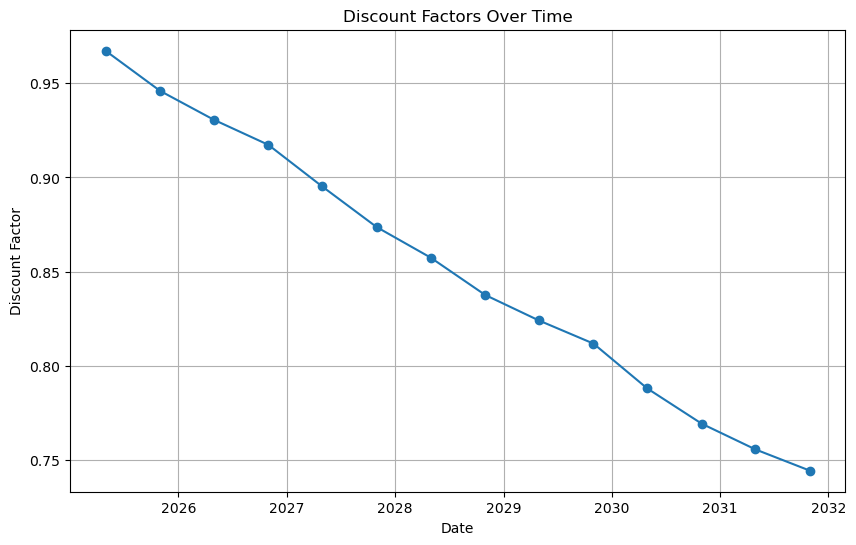

In [261]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, discount_factors.values, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Factor')
plt.title('Discount Factors Over Time')
plt.grid(True)
plt.show()

In [262]:
time_to_maturity = np.array([.5 + i * 0.5 for i in range(len(discount_factors))])
semi_annual_rate = 2 / time_to_maturity * (1 / discount_factors.values - 1)
continuous_rate = -np.log(discount_factors.values ) / time_to_maturity

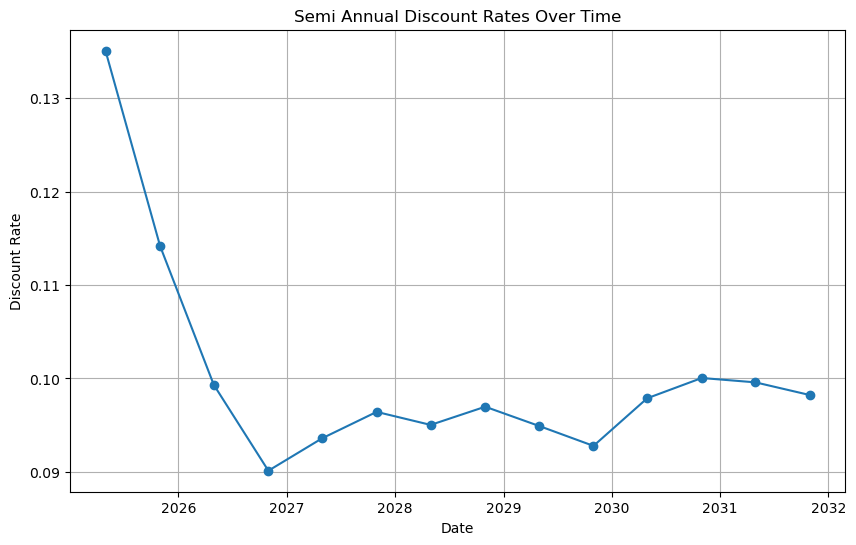

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, semi_annual_rate, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Rate')
plt.title('Semi Annual Discount Rates Over Time')
plt.grid(True)
plt.show()

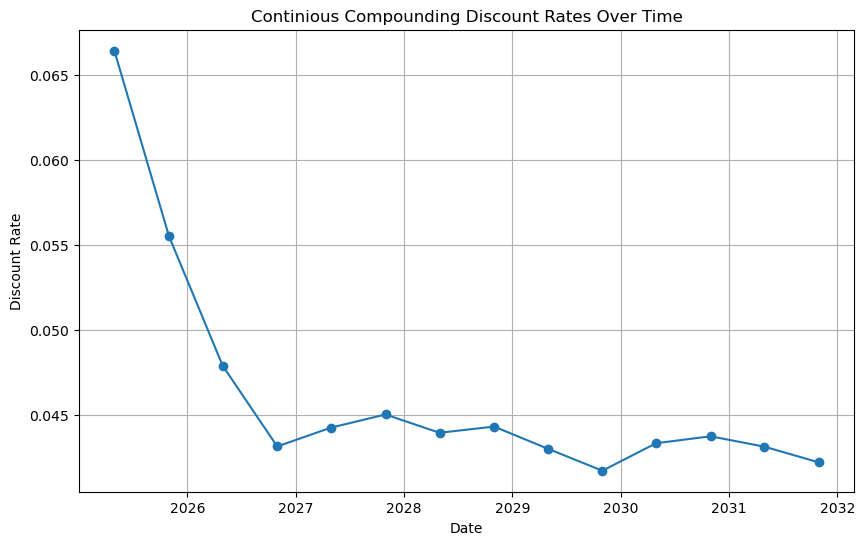

In [264]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, continuous_rate, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Rate')
plt.title('Continious Compounding Discount Rates Over Time')
plt.grid(True)
plt.show()

### 1.4.

Suppose that all discount rates and all coupon rates go up by 0.5\%. 

Calculate the new price of each of the treasury securities, using present value pricing.

***

# 2. Estimating the Discount Curve with Real Data

Use the data in the `quotes` tab.

### 2.1. Map Cashflows

Construct the cashflow matrix.

Given the unfiltered data set, you will need to make a few modeling choices to do this...
* eliminate any treasury that does not report YTM or that reports a negative YTM.
* assume notes and bonds pay coupons every six months, going backward from the date of maturity.

Make other reasonable modeling assumptions as needed.

Report:
* head and tail rows of the dataframe, $\textbf{C}$, for instance, using `display()`.

* which date has the most cashflow across all issues?

* which date has the most issues paying a cashflow?

### 2.2. OLS

Estimate the discount factors using OLS.

Starting with the cashflow matrix, $C$, create an additional filter to get a subset where every date has at least one maturity, (possibly multiple,) and every issue has its maturity in the cashflow matrix. Call this set of cashflows, $\hat{C}$.

**Report 5 head and tail rows of $\hat{C}$.**

$$\textbf{p} = \hat{\textbf{C}}\,\textbf{z}_{\text{ols}}+\epsilon$$

Plot the time-to-maturity vs discount rates, semiannually compounded.

### 2.3. EXTRA (not graded)

Re-do `2.2.`, but this time use Weighted Least Squares. Find a weighting scheme that puts more weight on more recently issued treasures and less weight on less recently issued treasures. 

Does your answer change much?


### 2.4. Curve-Fitting

Continue with the model of cashflows (having filtered out some treasuries).

Estimate the discount curve via the Nelson-Siegel model.
* Fit via minimizing the sum of squared errors of the modeled prices against the quoted prices.
* Consider using `minimize` from `scipy.optimize`.

When done,
* Report the estimated NS parameters.
* Plot the semiannually-compounded discount rates along with those estimated with OLS from above.

***

# 3. Yield-Curve Factors

### Data
This section uses data in `'../data/yields.xlsx`.



### 3.1. Yield Curve Movements

Use the yield curve time-series data to calculate the time-series of the **level**, **slope**, and **curvature** factors.

Calculate the yield-curve factors. For each point in time, calculate the following three factors:

$\begin{align}
x^{\text{level}}_t =& \frac{1}{N_{\text{yields}}}\sum_{i=1}^{N_{\text{yields}}} y^{(i)}_t\\
x^{\text{slope}}_t =& y^{(30)}_t - y^{(1)}_t\\
x^{\text{curvature}}_t =& -y^{(1)}_t + 2 y^{(10)}_t - y^{(30)}_t
\end{align}$

Report the 
* correlation matrix of the factors.
* *mean and volatility of the factors.

### 3.2. PCA

Calculate the principal components of the time-series yield data.

Report...
* the percentage of total variation explained by each factor.
* the loadings of the first two PCA factors.

#### Note
Consider using,
`PCA` from `sklearn.decomposition` 

### 3.3. Comparison

Compare the ad-hoc factors from `3.1.` with the PCA-estimated factors in `3.2.`.

Estimate the correlation of the ad-hoc level factor with the PCA-1. And the slope factor with PCA-2.